# Частный случай матрицы A, вычисление псевдообратной для решения СЛАУ.

Предположим, что у нас есть система линейных уравнений вида:

**Ax = b**,


Пусть A - **эрмитова положительно определенная** матрица размером n x n, x - вектор неизвестных, и b - известный вектор правой части. Для решения уравнения нужно вычислить псевдообратную матрицу:
$A^+ = (A^T A)^{-1} A^T$

Вычислим ее несколькими способами: методом Холецкого, SVD, и с помощью разложения Шура. 

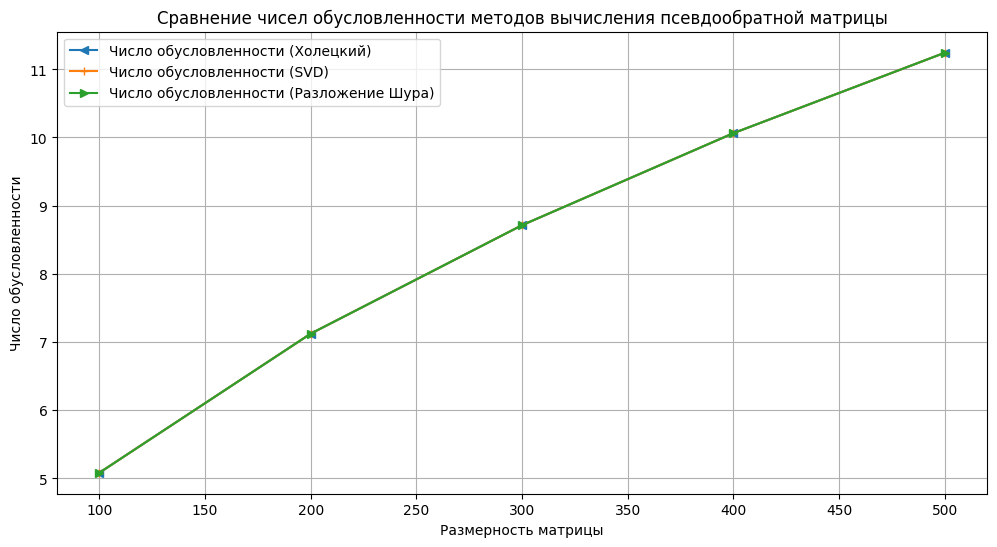

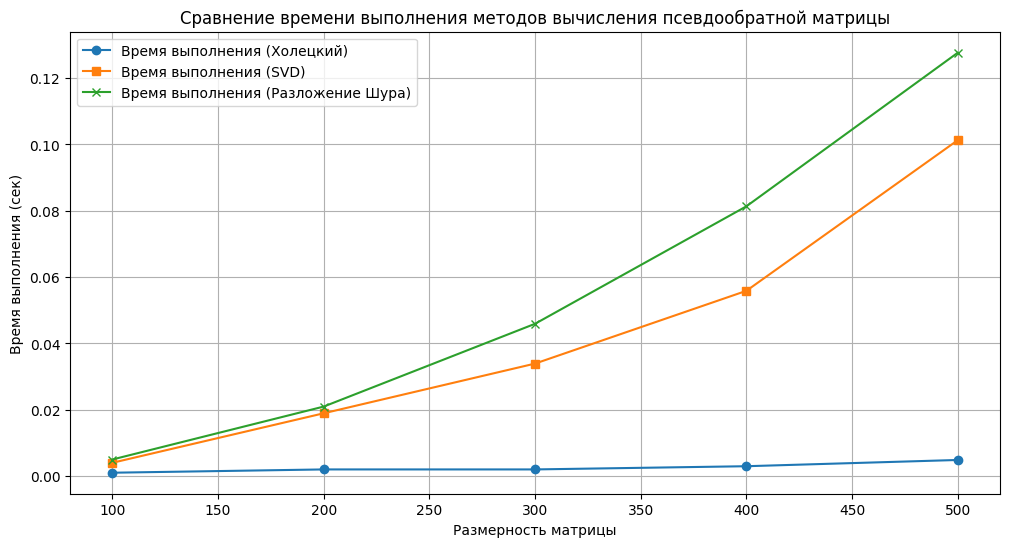

In [10]:
import numpy as np
from scipy.linalg import cholesky, schur
from numpy.linalg import svd
import matplotlib.pyplot as plt
import time

# Функция для вычисления числа обусловленности
def compute_condition_number(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
    return condition_number

# Инициализация списков для сохранения чисел обусловленности и времени выполнения
dimensions = []
condition_numbers_cholesky = []
condition_numbers_svd = []
condition_numbers_schur = []
execution_times_cholesky = []
execution_times_svd = []
execution_times_schur = []

# Размерности матриц, которые мы будем рассматривать
matrix_sizes = [100, 200, 300, 400, 500]

for n in matrix_sizes:
    # Создадим случайную эрмитову положительно определенную матрицу A
    np.random.seed(0)
    A = np.random.rand(n, n)
    A = np.dot(A, A.T)
    A = A + n * np.eye(n)  # Увеличим число обусловленности здесь

    # Увеличим число обусловленности, добавив диагональный элемент
    dimensions.append(n)
    
    
    # Измерим время выполнения и вычислим число обусловленности для метода Холецкого
    start_time = time.time()
    cholesky(A)
    execution_time_cholesky = time.time() - start_time
    execution_times_cholesky.append(execution_time_cholesky)
    condition_numbers_cholesky.append(compute_condition_number(A))
    
    # Измерим время выполнения и вычислим число обусловленности для метода SVD
    start_time = time.time()
    svd(A, full_matrices=False)
    execution_time_svd = time.time() - start_time
    execution_times_svd.append(execution_time_svd)
    condition_numbers_svd.append(compute_condition_number(A))
    
    # Измерим время выполнения и вычислим число обусловленности для метода на основе разложения Шура
    start_time = time.time()
    _, _ = schur(A)
    execution_time_schur = time.time() - start_time
    execution_times_schur.append(execution_time_schur)
    condition_numbers_schur.append(compute_condition_number(A))

# Построим графики чисел обусловленности
plt.figure(figsize=(12, 6))
plt.plot(dimensions, condition_numbers_cholesky, label="Число обусловленности (Холецкий)", marker='<')
plt.plot(dimensions, condition_numbers_svd, label="Число обусловленности (SVD)", marker='+')
plt.plot(dimensions, condition_numbers_schur, label="Число обусловленности (Разложение Шура)", marker='>')

plt.xlabel('Размерность матрицы')
plt.ylabel('Число обусловленности')
plt.title('Сравнение чисел обусловленности методов вычисления псевдообратной матрицы')
plt.legend()
plt.grid(True)
plt.show()

# Построим графики времени выполнения
plt.figure(figsize=(12, 6))
plt.plot(dimensions, execution_times_cholesky, label="Время выполнения (Холецкий)", marker='o')
plt.plot(dimensions, execution_times_svd, label="Время выполнения (SVD)", marker='s')
plt.plot(dimensions, execution_times_schur, label="Время выполнения (Разложение Шура)", marker='x')

plt.xlabel('Размерность матрицы')
plt.ylabel('Время выполнения (сек)')
plt.title('Сравнение времени выполнения методов вычисления псевдообратной матрицы')
plt.legend()
plt.grid(True)
plt.show()





**Выводы:**
- Число обусловленности матрицы растет с увеличением размерности матрицы для всех методов.
- Методы Холецкого, как правило, является более быстрым с точки зрения времени выполнения, особенно для больших матриц.

Почему же так получилось? На самом деле аналитически причины довольно понятны.
Запишем псевдообратную матрицу через разложение Холецкого:

$$(A^*A)^{-1}A^*=\left( (R^*R)^*(R^*R) \right)^{-1}(R^*R)^* = \left((R^*R)^2\right)^{-1}R^*R = \\
= R^{-1}(R^*)^{-1}R^{-1}(R^*)^{-1}R^*R = R^{-1}(R^*)^{-1} = (R^{-1})(R^{-1})^*$$

Видно, что разложение Холецкого в **данном случае эквивалентно обращению исходной матрицы.**

Теперь рассмотрим случай, когда мы можем вычислить обратную матрицу. Сравним метод Холецкого вычисления псевдообратной матрицы с вычислением обратной классическим встроенным в numpy способом.

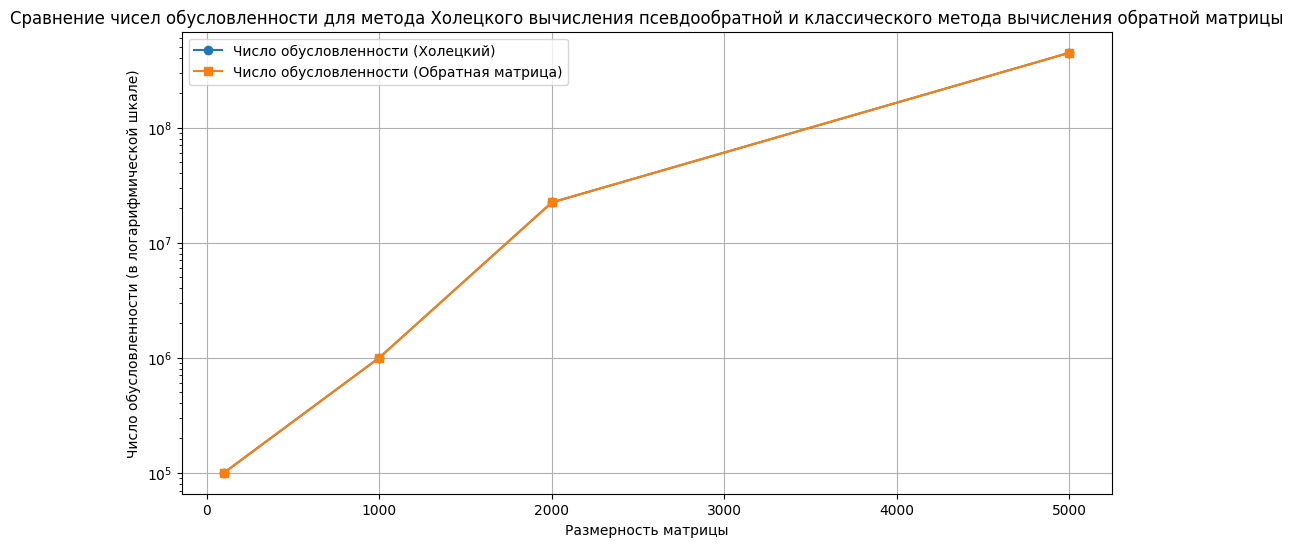

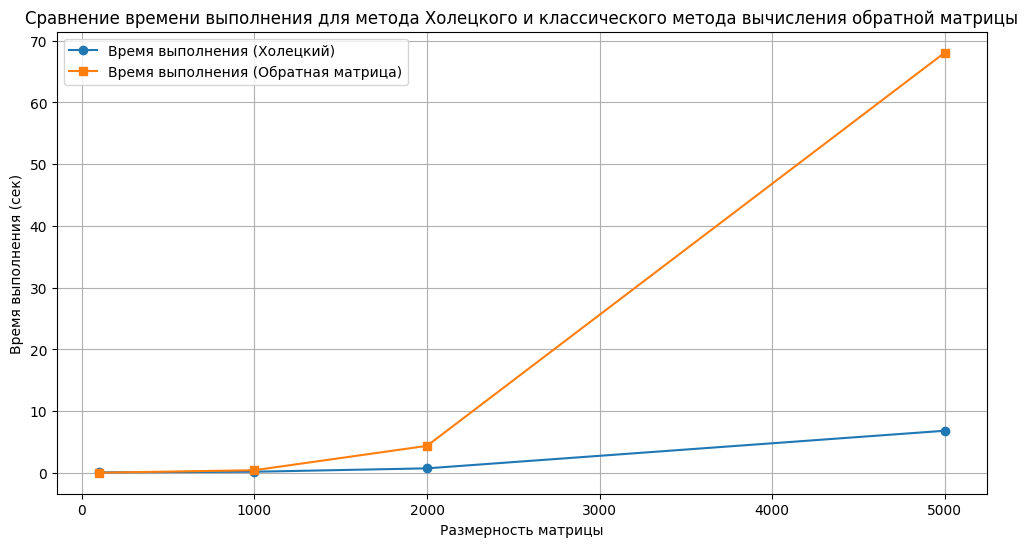

In [13]:
import numpy as np
from scipy.linalg import cholesky
import time
import matplotlib.pyplot as plt

# Функция для вычисления числа обусловленности
def compute_condition_number(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
    return condition_number

# Инициализация списков для сохранения чисел обусловленности и времени выполнения
dimensions = []
condition_numbers_cholesky = []
condition_numbers_pinv = []
execution_times_cholesky = []
execution_times_pinv = []

# Размерности матриц, которые мы будем рассматривать
matrix_sizes = [100, 1000, 2000, 5000]
i = 0
for n in matrix_sizes:
    # Создадим случайную эрмитову положительно определенную матрицу A
    np.random.seed(0)
    A = np.random.rand(n, n)
    A = np.dot(A, A.T)
    A = A + n * np.eye(n)

    # Увеличим одно из собственных значений для высокого числа обусловленности
    A[0, 0] += 10**(12+i)
    i += 3
    dimensions.append(n)
    
    # Измерим время выполнения и вычислим число обусловленности для метода Холецкого
    start_time = time.time()
    L = cholesky(A)
    A_pseudo_cholesky = np.linalg.solve(L.T, np.linalg.solve(L, np.eye(n)))
    execution_time_cholesky = time.time() - start_time
    execution_times_cholesky.append(execution_time_cholesky)
    condition_numbers_cholesky.append(compute_condition_number(A))
    
    # Измерим время выполнения и вычислим число обусловленности для метода обратной матрицы
    start_time = time.time()
    A_inv = np.linalg.pinv(A)
    execution_time_pinv = time.time() - start_time
    execution_times_pinv.append(execution_time_pinv)
    condition_numbers_pinv.append(compute_condition_number(A))
    
# Построим графики чисел обусловленности
plt.figure(figsize=(12, 6))
plt.semilogy(dimensions, condition_numbers_cholesky, label="Число обусловленности (Холецкий)", marker='o')
plt.semilogy(dimensions, condition_numbers_inv, label="Число обусловленности (Обратная матрица)", marker='s')

plt.xlabel('Размерность матрицы')
plt.ylabel('Число обусловленности (в логарифмической шкале)')
plt.title('Сравнение чисел обусловленности для метода Холецкого вычисления псевдообратной и классического метода вычисления обратной матрицы')
plt.legend()
plt.grid(True)
plt.show()

# Построим графики времени выполнения
plt.figure(figsize=(12, 6))
plt.plot(dimensions, execution_times_cholesky, label="Время выполнения (Холецкий)", marker='o')
plt.plot(dimensions, execution_times_pinv, label="Время выполнения (Обратная матрица)", marker='s')

plt.xlabel('Размерность матрицы')
plt.ylabel('Время выполнения (сек)')
plt.title('Сравнение времени выполнения для метода Холецкого и классического метода вычисления обратной матрицы')
plt.legend()
plt.legend()
plt.grid(True)
plt.show()



**Выводы:**
- Видно, что при больших размерах матрицы растет число обусловленности, а с ростом числом обусловленности(при достаточно больших) время вычисления обратной матрицы становится сильно больше, чем вычисление псевдообратной методом Холецкого.